## Copyright 2020 Yiming Hu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Purporse of the code
Compare 1. fast Fourier transform (FFT) of time domain series, convolve them in frequency domain and 2. multiply in time domain and FFT to frequency domain, and demonstrate they are consistent.

For demonstration purpose, adopt the two functions as sine Gaussian
$$h(t) = \exp(-a t^2) \exp(i 2 \pi f_c t)$$ 
and addition of sinusoid
$$g(t) = \sin(f_1 t)+ \sin (f_2 t+\phi)$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [111]:
NumPoints = 100001
SampleRate= 100 # Hz
T_length  = NumPoints/SampleRate # so that the signal is middled in time
TimeSteps = np.linspace(0,T_length,NumPoints)
fc        = 1
f1        = 2
f2        = 5
phi       = 1.5 # arbitrary choice of paramters
a         = 1./2/T_length   # see
                            # https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.gausspulse.html 
                            #for more info
def h(t,a,fc):
    return scipy.signal.gausspulse(t, fc ,bw=a)

def g(t,f1,f2,phi):
    return np.sin(f1*t)+np.sin(f2*t+phi)

Text(0.5, 1.0, 'part of the plot')

/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


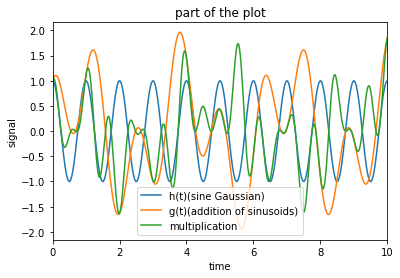

In [112]:
h_t = h(TimeSteps,a,fc)
g_t = g(TimeSteps,f1,f2,phi)
plt.plot(TimeSteps,h_t,label='h(t)(sine Gaussian)')
plt.plot(TimeSteps,g_t,label='g(t)(addition of sinusoids)')
plt.plot(TimeSteps,h_t*g_t,label='multiplication')
plt.xlim(0,10)
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()
plt.title('part of the plot')

## Method 1
FFT individually, then convolve in frequency domain
$$\mathcal{F}(h)(f)\circledast\mathcal{F}(g)(f)$$  

In [119]:
h_f        = np.fft.fftshift(np.fft.fft(h_t))
FreqF      = np.fft.fftshift(np.fft.fftfreq(NumPoints,1./SampleRate))/NumPoints

g_f        = np.fft.fftshift(np.fft.fft(g_t))
FreqG      = np.fft.fftshift(np.fft.fftfreq(NumPoints,1./SampleRate))/NumPoints

ConvInFreq = np.convolve(h_f,g_f,'same')/NumPoints**2
#ConvInFreq = scipy.signal.fftconvolve(h_f,g_f,'same')/NumPoints**2

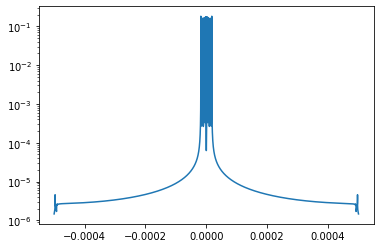

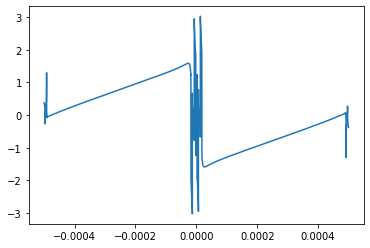

In [120]:
plt.semilogy(FreqF,np.abs(ConvInFreq))
plt.figure()
plt.plot(FreqF,np.angle(ConvInFreq))

## Method 2
multiply in time domain, then FFT to frequency domain
$$\mathcal{F}(h\times g)(f)$$  

In [121]:
f_times_g   = h_t*g_t
FFT_product = np.fft.fftshift(np.fft.fft(f_times_g))/NumPoints
FreqFdotG   = np.fft.fftshift(np.fft.fftfreq(NumPoints,1./SampleRate))

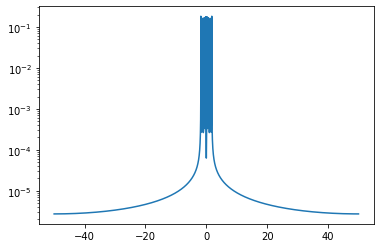

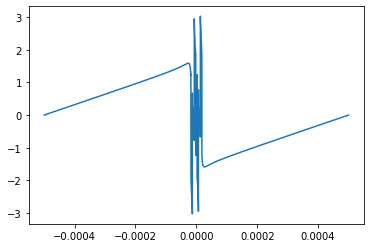

In [122]:
plt.semilogy(FreqFdotG,np.abs(FFT_product))
plt.figure()
plt.plot(FreqF,np.angle(FFT_product))

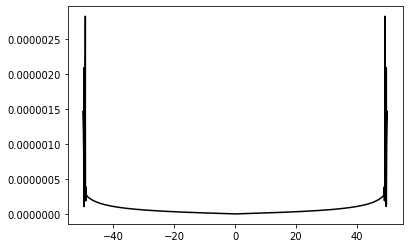

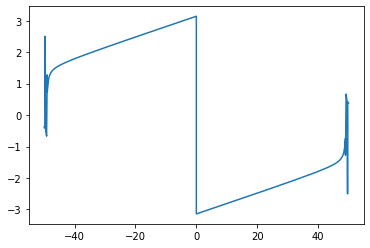

In [129]:
difference = FFT_product - ConvInFreq
plt.plot(FreqFdotG,np.abs(difference),'k-')
plt.figure()
plt.plot(FreqFdotG,np.angle(difference))